<a style="float:left;" href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Lab-Iris/Survol-Apprentissage_Automatique_Classique-Iris.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<br/>
### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter) 
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables.

<h1 style="font-size:250%;text-align:center">Survol de l'apprentissage automatique classique</h1>
<h1 style="font-size:250%;text-align:center">avec le jeu de données des Iris gaspésiens</h1>
<h1 style="font-size:250%;text-align:center">et Scikit-Learn (Sklearn)</h1>
<br/><br/>
<img src="https://cours.edulib.org/asset-v1:Cegep-Matane+VAERN.1FR+P2021+type@asset+block@ScDo-ScikitLearn-logo.jpeg" width=300 style="float:center;"/>
<br/>



## Importation des bibliothèques utilisées pour le tutoriel


In [1]:
# Importer toutes les bibliothèques, classes et fonctions 
# utilisées pour le tutoriel dans l'espace de travail
import scipy # bibliothèque de calcul scientifique 
import matplotlib # bibliothèque d'affichage graphique
import sklearn # bibliothèque d'algorithmes "classiques" d'apprentissage automatique 

# Pour de grosses bibliothèques, vous pouvez importer seulement des parties 
# avec from <bibliothèque> import <classe/objet>
# Note: «import *» importe le code de TOUS les paquets (packages), 
from numpy import * # bibliothèque de calcul matriciel
from pandas import * # bibliothèque de manipulation de tableaux de données
from sklearn import * # bibliothèque d'algorithmes "classiques" d'apprentissage automatique

# Important: pour éviter des conflits dans l'espace de nommage, 
# vous pouvez renommer les bibliothèques importées

# Renommages conventionnels: 
## import <bibliothèque> as <abréviation>
# numpy devient «np»
import numpy as np
## matplotlib devient «plt»
import matplotlib.pyplot as plt
# La manière usuelle d'importer Pandas
# Importer la biblothèque Pandas et la renommer «pd» 
import pandas as pd

# Pour de grosses bibliothèques, vous pouvez importer seulement des parties 
# avec from <bibliothèque> import <classe/objet>
# Importer les classes «Series» et «DataFrame» de Pandas
from pandas import Series, DataFrame

# Importer des classes ou fonctions spécifiques d'une bibliothèque 
# from <bibliotheque> import <fonction>
from pandas import DataFrame, read_csv

# Activer l'affichage des graphiques dans la page du Notebook iPython
%matplotlib inline

# Importer IPython afin de pouvoir vérifier sa version et d'afficher des contenus web dans le carnet
import IPython

# Bibliothèque «sys», utilisée uniquement pour obtenir les numéros de versions
import sys 

print("Bibliothèques Python importées")

Bibliothèques Python importées


### Vérification de l'installation

In [2]:
# Vérification des versions des bibliothèques Python importées
print('Version de Python: ',sys.version)
print('Version de IPython: ',IPython.__version__)
print('Version de NumPy: ',np.__version__)
print('Version de Matplotlib: ',matplotlib.__version__)
print('Version de SciPy: ',scipy.__version__)
print('Version de Pandas: ',pd.__version__)
print('Version de Scikit-Learn: ',sklearn.__version__)

Version de Python:  3.9.1 (v3.9.1:1e5d33e9b9, Dec  7 2020, 12:10:52) 
[Clang 6.0 (clang-600.0.57)]
Version de IPython:  7.19.0
Version de NumPy:  1.19.4
Version de Matplotlib:  3.3.4
Version de SciPy:  1.5.4
Version de Pandas:  1.2.0
Version de Scikit-Learn:  0.24.0


## Lecture et chargement des données

Nous allons utiliser le célèbre jeu de de données sur les fleurs d'iris de Gaspésie. 

Rappelons que ce jeu de données contient 150 observations ou exemplaires de fleurs d'iris. Chaque observation comporte quatre attributs (longueur et la largeur des pétales et des sépales) mesurés sur des fleurs d'iris de trois espèces différentes (Iris setosa, Iris versicolor, Iris virginica). 

Cela donne un tableau de cinq colonnes, les quatre premières colonnes contiennent des mesures des fleurs en centimètres. La cinquième colonne contient l'étiquette de classe qui est l'espèce de la fleur observée. 

<ol>
    <li>longueur des sépales en cm</li>
    <li>largeur des sépales en cm</li>
    <li>longueur des pétales en cm</li>
    <li>largeur des pétales en cm</li>
    <li>espèces (étiquette de classe): "Iris-setosa", ou "Iris-versicolor", ou "Iris-virginica"</li>
</ol>

### Téléchargement des données 'iris.data' du site de l'université de Californie à Irvine

<a href="https://archive.ics.uci.edu/ml/index.php/" target="_blank">UCI Machine Learning Repository</a>

Note: le jeu de données 'iris.data' qui est en format .csv (comma separated value), sera téléchargés dans le répertoire local

In [3]:
# Commande Linux pour connaître le chemin du répertoire local
!pwd

/Users/claudecoulombe/Documents/PERSONNEL/LINGUA_CLOM-Expert/Projet_VIARENA/Lab-Iris


In [4]:
# Commande Linux pour télécharger un fichier è partir de son URL
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
print("Données Iris téléchargées")

--2021-03-08 05:10:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.2’

iris.data.2         100%[===================>]   4.44K  --.-KB/s    in 0.007s  

2021-03-08 05:10:30 (640 KB/s) - ‘iris.data.2’ saved [4551/4551]

Données Iris téléchargées


### Lecture des données - fonction Pandas `read_csv()`

In [5]:
# Création d'une liste de noms d'attributs en français
noms_attributs = ["longueur_sépales","largeur_sépales","longueur_pétales","largeur_pétales", "espèce"]

# pd.read_csv(...) cette fonction de Pandas Retourne un Dataframe ou tableau de données analogue à un tableur 
# où chaque ligne représente un exemplaire de données (observations ou exemples) 
# et chaque colonne représente la valeur d'un attribut (ou caractéristique).
donnees_iris_df = pd.read_csv("./iris.data", names=noms_attributs)
print("Données Iris lues et mémorisées dans la variable 'donnees_iris_df'")

Données Iris lues et mémorisées dans la variable 'donnees_iris_df'


## Exploration des données

L’analyse des données débute généralement par l'exploration et la visualisation des données. On cherche ici à se familiariser, mieux comprendre et détecter des éventuelles anomalies comme les données aberrantes. 


### Échantillonnage - fonction Dataframe `.sample()`

En utilisant la fonction `.sample()` de DataFrame, nous allons choisir au hasard 12 exemplaires de données. 

Le paramètre `random_state` fixé arbitrairement à 42 assure que le tirage est reproductible
<hr/>
Note culture: <a ref="https://fr.wikipedia.org/wiki/42_(nombre)#Fiction">42 est la réponse à la grande question dans 'Le Guide du voyageur galactique'</a>. 

In [6]:
# Ci-dessous, nous procédons au tirage de 12 exemplaires des
# données d'entraînement. Le paramètre `random_state` fixé 
# arbitrairement à 42 assure que le tirage est reproductible 
donnees_iris_df.sample(n= 12, random_state=42)

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales,espèce
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


### Vues récapitulatives, l'attribut DataFrame `.shape` et la fonction DataFrame `.describe()`

Une seconde étape consiste à explorer chaque attribut (ou caractéristique) pour en connaître la distribution statistique. Par exemple, les différentes valeurs, l’étendue (valeur minimale, valeur maximale), la moyenne, et la variance. 

#### Format du tableau de données - l'attribut DataFrame `.shape` 

In [7]:
donnees_iris_df.shape

(150, 5)

On voit que le fichier comporte 150 lignes ou exemplaires et 5 colonnes ou attributs

#### Obtenir le nom des colonnes ou attributs du tableau de données - l'attribut DataFframe `.columns` 

In [8]:
donnees_iris_df.columns

Index(['longueur_sépales', 'largeur_sépales', 'longueur_pétales',
       'largeur_pétales', 'espèce'],
      dtype='object')

#### Statistiques descriptives globales du tableau de données - fonction DataFrame `.describe()`

Maintenant, examinons notre tableau de données avec la fonction DataFrame `.describe()` 

La fonction `describe()` retourne plusieurs statistiques sommaires d'un seul coup.

In [9]:
donnees_iris_df.describe()

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


On voit ci-haut que le DataFrame «donnees_iris_df» comporte 150 rangées qui correspondent à autant d'observations ou exemplaires de données sur les fleurs d'Iris. Par exemple, la longueur moyenne des sépales est 5.84 cm, la longueur minimale des sépales est 4.3 cm, la longueur au 1er quartile Q1 (25%) est de 5.1 cm (i.e. 25% des mesures sont < 5.1 cm)  la médiane Q2 (50%) est de 5.8 cm (i.e. 50% des mesures sont < 5.8 cm), la longueur du 3e quartile (75%) est de 6.4 cm (i.e. 75% des mesures sont < 6.4 cm), la longueur maximale des sépales est 7.9 cm,. 

On remarquera aussi, que les attributs catégoriels comme 'espèce' ne sont pas considérés par la fonction `.describe()`

## Classification

### Chargement des bibliothèques de scikit-learn ou `sklearn`

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Bibliothèques Sklearn importées")

Bibliothèques Sklearn importées


### Détermination de la classe-cible et des prédicteurs

Nous cherchons à prédire l'espèce de l'iris à partir des mesures de la longueur et la largeur des pétales et des sépales de fleurs d'iris. La cible (ou classe-cible) sera `espèce` et les prédicteurs (ou attributs-prédicteurs) seront: `espèce_Iris-setosa`, `espèce_Iris-versicolor`, `espèce_Iris-virginica`.    

Note terminologie: 

* classe-cible, cible ou classe, ou prédiction, ou variable dépendante sont des termes équivalents
* prédicteurs, ou attributs ou variables indépendantes sont des termes équivalents

#### Séparation de la cible et des prédicteurs

Puisque le but est de prédire la cible (ou classe-cible), il faut donc l'isoler des autres attributs prédicteurs pour constituer l'ensemble des cibles. Rappelons que dans notre exemple, les cibles prennent les valeurs: "espèce_Iris-setosa", "espèce_Iris-versicolor", "espèce_Iris-virginica". On crée également un autre ensemble contenant les prédicteurs. 

In [11]:
cibles_df = donnees_iris_df['espèce']

In [12]:
cibles_df.shape

(150,)

In [13]:
cibles_df.sample(n= 12, random_state=42)

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
Name: espèce, dtype: object

In [14]:
predicteurs_df = donnees_iris_df.drop(['espèce'],axis='columns')

In [15]:
predicteurs_df.sample(n= 12, random_state=42)

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [16]:
predicteurs_df.shape

(150, 4)

### Établissement d'une base de référence

Nous allons calculer le pourcentage de chaque classe-cible sur la base de la statistique descriptive, il existe de nombreuses façons d'y parvenir. 

Ce résultat nous donnera une base de référence (baseline) et un modèle de décision à une règle (OneR) qui consiste à prédire l'espèce de l'iris uniquement sur la base de statistiques sans faire intervenir l'apprentissage automatique.


In [17]:
# On calcule la moyenne `mean()` des cas où la classe-cible correspond à une valeur donnée
print("Iris-setosa:{pourcent: .2f} %".format(pourcent=mean(cibles_df == "Iris-setosa")*100))
print("Iris-versicolor:{pourcent: .2f} %".format(pourcent=mean(cibles_df == "Iris-versicolor")*100))
print("Iris-virginica:{pourcent: .2f} %".format(pourcent=mean(cibles_df == "Iris-virginica")*100))

Iris-setosa: 33.33 %
Iris-versicolor: 33.33 %
Iris-virginica: 33.33 %


Sans trop de surprise, on trouve que nos trois classes-cibles sont distribuées également ce qui correcpond à 33%. 

Donc la base de référence à battre est 33.33 % de bonne prévision pour chaque étiquette.

L'idée du modèle de décision à une règle (OneR) est simple. On a tout simplement à prévoir systématiquement une espèce, par exemple `Iris-versicolor` et on aura statistiquement raison 1 fois sur 3. C'est la référence de base de notre modèle. 

Cela ne veut pas dire que nous serons satisfaits par ce résultat et il faudra se fixer un objectif plus ambitieux comme 90 % par exemple. L'objectif pourra être fixé par les besoins de l'application. Une façon usuelle est de se comparer à la performance d'une personne ayant reçu un formation minimale ou encore un expert botaniste que l'on scherche à assister ou à remplacer. 

In [18]:
cibles_df

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: espèce, Length: 150, dtype: object

### Préparation des données pour Scikit-Learn

Scikit-Learn exige que les attributs prennent des valeurs numériques avec décimales (catégories). Il faut donc convertir les valeurs catégorielles en valeurs numériques. Il faut également qu'il n'y ait pas de valeur manquante dans les données.   

Aussi, Scikit-Learn s'attend que les attributs se trouvent dans un tableau où chaque colonne est un attribut et chaque ligne un exemplaire de données (observation ou point de données).

#### Encodage des attributs catégoriels - fonction Sklearn `LabelEncoder()`

Rappelons qu'un attribut catégoriel prend des valeurs d'étiquettes symboliques. Par exemple, l'attribut "couleur" peut prendre les valeurs "rouge", "vert" et "bleu". Les algorithmes d'apprentissage automatique dont les réseaux de neurones profonds exigent que les variables d'entrée soient des nombres. Il faut donc encoder les données catégorielles en nombres avant de les utiliser pour entraîner un modèle.

In [19]:
from sklearn.preprocessing import LabelEncoder

encodeur = LabelEncoder()
encodeur.fit(cibles_df.values)
cibles = encodeur.transform(cibles_df)
# Afficher les dix premières cibles
cibles [:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Conversion des données en nombre avec décimales

Idéalement, toutes les valeurs d'attributs devraient être converties en un nombre avec décimales normalisé entre 0 et 1 car certains algorithmes de Scikit-Learn sont sensibles à la grandeur des différents attributs. 


Il existe des fonctions dans Scikit-Learn pour nous aider.



In [20]:
predicteurs = predicteurs_df.values

### Division en données d'entraînement et de test - fonction Sklearn `train_test_split()`

Nous allons retenir une partie des données dans un jeu de données de test que l'algorithme ne verra pas et nous utiliserons ces données pour avoir une idée des performances du modèle sur des données inconnues.

Nous diviserons l'ensemble de données en deux, dont typiquement 80 % serviront à l'entraînement, à l'évaluation et à la sélection parmi nos modèles, et 20 % seront retenues comme ensemble de données de test.

<ul>
    <li>Dans un premier temps, nous allons partager les données entre un ensemble de données d'entraînement et un ensemble de données de test. Les données de test seront isolées et conservées pour évaluer la performance finale des algorithmes sur des données fraîches. C'est ce qu'on appelle la mesure de l'erreur de généralisation.</li>
</ul>

Note technique: Le paramètre de stratification `stratify` s'assure que la répartition aléatoire des données de `train_test_split()` respecte la proportion de valeurs dans l'échantillon fourni à `stratify`. Ceci est particulièrement important pour les petits jeux de données où la répartition aléatoire des données peut retourner des résultats très différents d'une fois à l'autre.

Par exemple, si la classe-cible `cibles_df` est un attribut catégoriel avec 3 valeurs réparties également comme dans l'exemple des données sur les Iris, l'affectaion `stratify=cibles_df` assurera que la répartition aléatoire respecte ce ratio. Évidemment s'il n'y a pas de répartition aléatoire et que le paramètre `shuffle=False`, alors `stratify=None`.

In [21]:
from sklearn.model_selection import train_test_split

# Le jeu de données de test contient 20% des données initiales
# Note: ce ratio peut varier en fonction de la taille du jeu de données
test_ratio = 0.20

# Isoler les données de test 
predicteurs_ent, predicteurs_test, cibles_ent, cibles_test = train_test_split(predicteurs,
                                                                              cibles,
                                                                              test_size=test_ratio,
                                                                              stratify=cibles_df,
                                                                              random_state=42)

In [22]:
print("Dimensions de predicteurs entrainement:",predicteurs_ent.shape)
print("Dimensions de predicteurs test:",predicteurs_test.shape)
print("Dimensions de cibles entrainement:",cibles_ent.shape)
print("Dimensions de cibles test:",cibles_test.shape)

Dimensions de predicteurs entrainement: (120, 4)
Dimensions de predicteurs test: (30, 4)
Dimensions de cibles entrainement: (120,)
Dimensions de cibles test: (30,)


In [23]:
cibles_ent, cibles_test

(array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
        2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
        0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
        2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
        1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
        0, 2, 1, 1, 0, 0, 0, 0, 1, 0]),
 array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
        1, 2, 2, 1, 1, 0, 2, 0]))

### Choix de différents algorithmes de classification

#### La régression logistique (sic) ou classification logistique

La régression logistique porte mal son nom, car il ne s’agit pas d’une régression où l'on prédit un nombre mais bien d'une classification entre deux classes-cibles. En fait, la régression logistique qui calcule une probabilité devient la classification logistique, un algorithme de classification, quand on la combine à une règle de décision. Si la probabilité est plus grand ou égal à 0.5 le résultat est 1, si le résultats est plus petit que 0.5, le résultat est 0. 

Le calcul de la probabilité est basé sur la fonction $\large{logistique(x) = \frac{L}{1+Ce^{-k(x-x_0}}}$ dont la fonction $\large sigmoïde(x)=\frac{1}{1+e^{-x}}$ est un cas particulier avec $L=1, C=1, k=1, x_0=0$. Notez en passant que la sigmoïde est utilisée dans les réseaux de neurones.

Ici, nous allons utiliser la classification logistique multinomiale qui est une extension de la classification logistique pour les situations à trois classes-cibles ou plus.

La classification logistique est un algorithme simple et robuste avec un bon pouvoir de généralisation.

#### Les algorithmes ensemblistes à base d'arbres

Depuis quelques années on observe dans les compétitions <a href="https://fr.wikipedia.org/wiki/Kaggle" target="_blank">Kaggle</a> et les articles scientifiques que les meilleurs algorithmes pour traiter des jeu de données de petite taille (#exemplaires < 100 000) et de faibles dimensions (#attributs < 5000) sont souvent des ensembles d'arbres de décision.

Ce sont deux algorithmes dit d'apprentissage ensembliste où chaque sous-échantillon correspond à un modèle distinct représenté par un <a href="https://fr.wikipedia.org/wiki/Arbre_de_d%C3%A9cision_(apprentissage)" target="_blank">arbre de décision</a>.

Scikit-Learn offre la possibilité d'élaborer des modèles non linéaires à base d'arbres qui sont connus pour bien performer dans des situations où le nombre d'attributs n'est pas très grand (moins de 5000). Nous allons expérimenter la forêt aléatoire (random forests) et les arbres à dopage de gradient (gradient boosting trees).

**Note**: Pour les gros jeux de données (#exemplaires > 100 000), dont au moins 5000 par cible, et pour des données en haute dimension (#attribut > 5000), les réseaux de neurones profonds s'avèrent généralement plus performants.

Référence: https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

#### Forêt aléatoire

La forêt aléatoire (random forest classifier) aussi appelées forêt d'arbres décisionnels, a été formellement proposée en 2001 par Leo Breiman et Adèle Cutler. Elle fait partie des techniques d'apprentissage ensembliste qui effectuent un apprentissage sur de multiples arbres de décision entraînés sur des sous-ensembles de données légèrement différents.

La forêt aléatoire se base sur l'agrégation par ré-échantillonnage ensembliste (en anglais, bagging pour bootstrap aggregation). Typiquement, le ré-échantillonnage ensembliste aide à réduire la variance et le surajustement. L'algorithme de la forêt aléatoire (en anglais, random forest) est une extension très utilisée du ré-échantillonnage ensembliste.  

Le résultat sera obtenu par le calcul de la moyenne pour une régression (prédiction d'un nombre) ou par un vote majoritaire dans le cas d'une classification (prédiction d'une classe-cible).

#### Arbres à dopage de gradient - XGBoost

Les arbres à dopage (boosting trees) de gradient ou arbres à gradient dopé se basent sur un méta-algorithme d'apprentissage ensembliste qui agrège itérativement des classificateurs faibles créés et pondérés selon leur performance pour former un classificateur final fort (capacité plus élevée, biais réduit), en l'occurrence ici des arbres de décisions. 

Par itérations successives, des classificateurs faibles (faible capacité, biais élevé), sous la forme de petits arbres de décision, sont ajoutés un à un à un ensemble d'arbres en utilisant une fonction de coût optimisée par descente de gradient.

Au moment de l'ajout d'un classificateur faible, la pondération des exemples de données (ou points de données) est réajustée (re-pondération) où les exemples mal classés gagnent du poids et les exemples bien classées perdent du poids. Ainsi, un nouveau classificateur faible se concentrera davantage sur les exemples mal classés par les classificateurs faibles précédents pour corriger leur influence. Rappelons qu'un classificateur faible est un classificateur capable de distinguer deux classes au moins aussi bien que le hasard ne le permet (il ne se trompe donc pas plus d'une fois sur deux en moyenne, si la distribution des classes est équilibrée). Des algorithmes très populaires appliquent le dopage de gradient comme l'incontournable XGBoost et AdaBoost (abréviation du terme adaptative boosting) qui a maintenant surtout une importance historique.

Note: Pour plus de généralité, on pourrait remplacer le mot «classificateur» par «modèle»

XGBoost en est un très bon exemple, XGBoost pour Extreme Gradient Boosting.

### Validation croisée - fonction Sklearn `StratifiedKFold()`

<ul>
    <li>Dans une deuxième temps, la recherche des meilleurs hyperparamètres sera effectuée avec les données d'entraînement ce qui impliquera la création d'ensembles de validation avec la validation croisée.</li> 
</ul>

Nous avons déjà divisé les données de façon aléatoire entre des données d'entraînement (80 %) et des données de test vierges (20 %) afin d'évaluer le modèle. 

La validation croisée permet de comparer des modèles et d'ajuster des hyperparamètres sans nécessiter un ensemble de validation séparé. Ceci préserve de précieuses données d’entraînement. Plus précisément, nous procéderons à une validation croisée à n plis (n-fold cross validation).

<img src="https://cours.edulib.org/asset-v1:Cegep-Matane+VAERN.1FR+P2021+type@asset+block@ScDo-Validation_croisee.png" width=700 style="float:center;"/>

 Au lieu de diviser nos données une seule fois, nous allons recommencer plusieurs fois et calculer le min, le max et la moyenne des scores comme une meilleure estimation du score réel. 


Référence: https://scikit-learn.org/stable/modules/cross_validation.html

### Outils d'évaluation d'un modèle

#### Matrice de confusion

Il est possible de voir le détail des faux positifs et des faux négatifs en affichant la matrice de confusion (confusion matrix).


In [24]:
def afficher_matrice_confusion(cm, noms_etiquettes = [u'classe - 0', u'classe - 1', u'classe - 3'],
                   titre=u'Matrice de confusion'):
#     plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    print("\n",cm,"\n")
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(titre)
    plt.colorbar()

    tick_marks = np.arange(len(noms_etiquettes))
    plt.xticks(tick_marks, noms_etiquettes, rotation=60)
    plt.yticks(tick_marks, noms_etiquettes)
    plt.ylabel(u'Vraie étiquette')
    plt.xlabel(u'Étiquette prédite')
    # Fonction d'ajustement
    plt.tight_layout()
    plt.show()


 [[ 7  2  1]
 [ 2  6  2]
 [ 0  0 10]] 



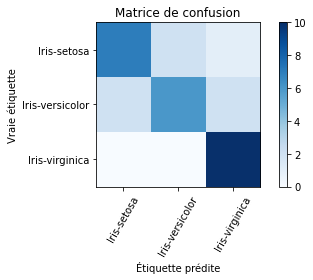

In [25]:
matrice_confusion = np.array([[7,  2,  1],[ 2,  6,  2],[ 0,  0, 10]])
noms_etiquettes = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
afficher_matrice_confusion(matrice_confusion, noms_etiquettes)

#### Autres méthodes d'évaluation d'un modèle statistique

<img src="https://cours.edulib.org/asset-v1:Cegep-Matane+VAERN.1FR+P2021+type@asset+block@ScDo-Methodes_Evaluation.png" />

### Évaluation finale du modèle avec les données de test

Nous avons retenu une partie des données dans le jeu de données de test que l'algorithme n'a pas touché. Nous utiliserons ces données pour avoir une idée des performances du modèle sur des données inconnues.

Entraînement des différents modèles...

Résultats de la validation croisée:

>  Classification logistique: 0.950000 (0.048591)
>  Forêt aléatoire: 0.950000 (0.031180)
>  Arbres à dopage de gradient - XGBoost: 0.958333 (0.026352)

 ****************************************************************************************************

Validation avec les données de test...

>  Classification logistique: - Erreur de classification sur les données test: 1
>  Classification logistique- Exactitude: 0.97
Matrice de confusion:


 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]] 



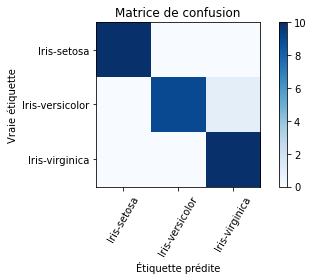


Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

------------------------------------------------------------------------------------------ 

>  Forêt aléatoire: - Erreur de classification sur les données test: 2
>  Forêt aléatoire- Exactitude: 0.93
Matrice de confusion:


 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]] 



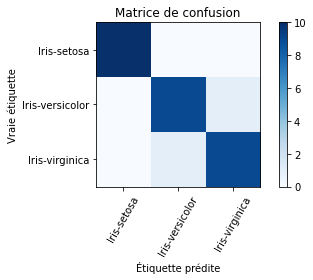


Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

------------------------------------------------------------------------------------------ 

>  Arbres à dopage de gradient - XGBoost: - Erreur de classification sur les données test: 2
>  Arbres à dopage de gradient - XGBoost- Exactitude: 0.93
Matrice de confusion:


 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]] 



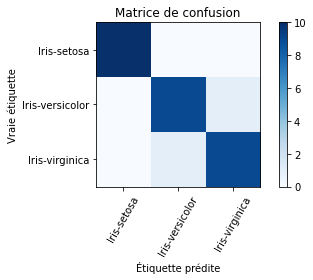


Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

------------------------------------------------------------------------------------------ 



In [26]:
# Inspiration: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# print("Version de XGBoost",xgb.__version__)

# Creation d'une liste de modèles
modeles = []
classification_logistique = LogisticRegression(solver='liblinear', multi_class='ovr')
modeles.append(("Classification logistique",classification_logistique))
foret_aleatoire = RandomForestClassifier()
modeles.append(("Forêt aléatoire",foret_aleatoire))
arbres_dopage_gradient = xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
modeles.append(("Arbres à dopage de gradient - XGBoost",arbres_dopage_gradient))

# Boucle d'entraînement et de validation croisée
resultats = []
noms_modeles = []
print("Entraînement des différents modèles...\n")
print("Résultats de la validation croisée:\n")
for nom_modele, modele in modeles:
    validation_croisee = StratifiedKFold(n_splits=5,
                                         random_state=42,
                                         shuffle=True)
    resultat_vc = cross_val_score(modele,
                                  predicteurs_ent,
                                  cibles_ent,
                                  cv=validation_croisee,
                                  scoring='accuracy')
    resultats.append(resultat_vc)
    noms_modeles.append(nom_modele)
    print('>  %s: %f (%f)' % (nom_modele, resultat_vc.mean(), resultat_vc.std()))

print("\n","*"*100)
print("\nValidation avec les données de test...\n")  
for nom_modele, modele in modeles:
    modele.fit(predicteurs_ent, cibles_ent)
    test_predictions = modele.predict(predicteurs_test)
    print('>  %s: - Erreur de classification sur les données test: %d' % 
          (nom_modele, (cibles_test != test_predictions).sum()))
    print('>  %s- Exactitude: %.2f' % 
          (nom_modele, accuracy_score(cibles_test, test_predictions)))
    # Affichage d'une matrice de cond=fusion et d'un rapport de classification
    print("Matrice de confusion:\n")
    afficher_matrice_confusion(confusion_matrix(cibles_test, test_predictions),['Iris-setosa','Iris-versicolor', 'Iris-virginica'])
    print("\nRapport de classification:\n",classification_report(cibles_test, test_predictions))
    print("-"*90,"\n")


## Ressources utiles

1) StackOverflow - https://stackoverflow.com

2) Pandas - tutoriels - https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

3) Expressions régulières - http://regex101.com/ - https://www.regular-expressions.info/tutorial.html

4) Matplotlib - tutoriels - https://matplotlib.org/3.1.1/tutorials/index.html

5) Scikit-Learn (ou Sklearn) - <a href="https://scikit-learn.org/stable/">Scikit-Learn</a>

In [27]:
print("Fin du carnet web")

Fin du carnet web
